# End-to-End Regression Project

In [60]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


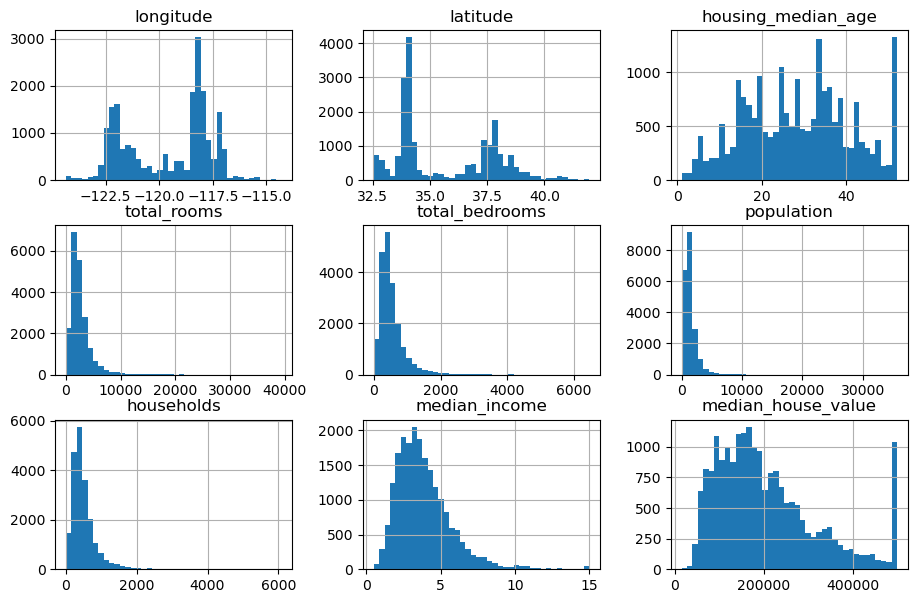

In [8]:
df.hist(bins=40, figsize=(11, 7));

## Test set and Test set

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
def shuffle_and_split_df(df: pd.DataFrame, test_ratio: float):
    np.random.seed(42)
    random_indices = np.random.permutation(len(df))
    test_set_size = int(len(df) * test_ratio)
    test_random_indices = random_indices[:test_set_size]
    train_random_indices = random_indices[test_set_size:]

    return df.iloc[train_random_indices], df.iloc[test_random_indices]

In [11]:
train_set, test_set = shuffle_and_split_df(df, 0.2)

In [12]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [13]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


In [14]:
from zlib import crc32  # Cycling Redundancy Check

In [15]:
crc32(np.int64(10))

4108501921

In [16]:
def is_identifier_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32

In [17]:
def split_train_test_with_identifier_hash(df, test_ratio, identifier_column):
    identifiers = df[identifier_column]
    in_test_set = identifiers.apply(lambda id_: is_identifier_in_test_set(id_, test_ratio))
    return df.loc[~in_test_set], df.loc[in_test_set]

In [19]:
train_set, test_set = split_train_test_with_identifier_hash(df.reset_index(), 0.2, "index")

In [20]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [21]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


In [22]:
df_with_identifier = df
df_with_identifier['identifier'] = df['longitude'] * 1000 + df['latitude']
df_with_identifier.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [23]:
train_set, test_set = split_train_test_with_identifier_hash(df_with_identifier, 0.2, "identifier")

In [24]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [26]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20
...,...,...,...,...,...,...,...,...,...,...,...
20616,-121.53,39.08,15.0,1810.0,441.0,1157.0,375.0,2.0469,55100.0,INLAND,-121490.92
20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND,-121490.94
20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0,INLAND,-121510.94
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,-121410.74


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=40)

In [29]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,63300.0,INLAND,-120003.07
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,174300.0,INLAND,-121001.00
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,350000.0,<1H OCEAN,-118205.94
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,268800.0,<1H OCEAN,-117886.36
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,385900.0,<1H OCEAN,-118315.87
...,...,...,...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675,61300.0,<1H OCEAN,-118056.23
16065,-122.48,37.75,49.0,2203.0,407.0,1052.0,405.0,4.4375,329200.0,NEAR BAY,-122442.25
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450,100000.0,NEAR OCEAN,-117197.14
14555,-117.13,32.96,15.0,2267.0,292.0,1180.0,289.0,6.7120,240200.0,<1H OCEAN,-117097.04


In [31]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
6607,-118.14,34.18,47.0,3457.0,622.0,1700.0,579.0,3.5164,226500.0,<1H OCEAN,-118105.82
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,<1H OCEAN,-121932.46
9457,-123.84,39.83,19.0,1461.0,340.0,515.0,227.0,1.5278,145800.0,NEAR OCEAN,-123800.17
18681,-121.82,36.86,17.0,1573.0,272.0,142.0,55.0,2.1719,420000.0,NEAR OCEAN,-121783.14
4654,-118.33,34.05,48.0,2405.0,527.0,1868.0,502.0,3.3750,257800.0,<1H OCEAN,-118295.95
...,...,...,...,...,...,...,...,...,...,...,...
19314,-122.87,38.43,36.0,1987.0,387.0,1065.0,347.0,4.0446,172200.0,<1H OCEAN,-122831.57
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN,-117216.80
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,181500.0,<1H OCEAN,-118395.77
3689,-118.36,34.23,15.0,2485.0,742.0,1994.0,670.0,2.8333,183200.0,<1H OCEAN,-118325.77


In [35]:
df["median_income_categories"] = pd.cut(
                                    df["median_income"],
                                    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                    labels=[1, 2, 3, 4, 5]
                                )
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57,2


<Axes: >

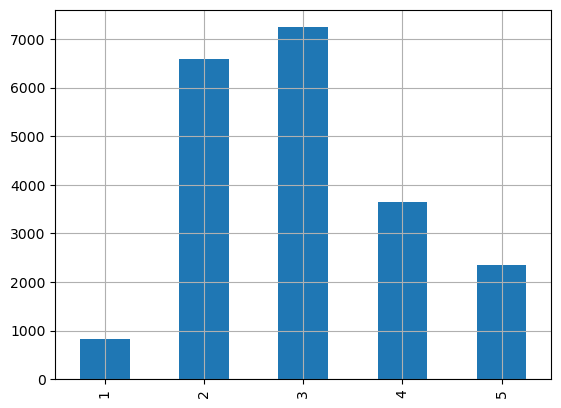

In [38]:
df["median_income_categories"].value_counts().sort_index().plot.bar(grid=True)

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit  # provides train/test indices to split data

In [41]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=40)
stratified_split = []
for train_idx, test_idx in sss.split(df, df["median_income_categories"]):
    stratified_train_set_n = df.iloc[train_idx]
    stratified_test_set_n = df.iloc[test_idx]
    stratified_split.append([stratified_train_set_n, stratified_test_set_n])

In [44]:
stratified_train_set, stratified_test_set = stratified_split[0]

In [45]:
stratified_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND,-121222.12,3
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND,-121602.15,3
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN,-118116.05,2
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN,-118205.93,2
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND,-121781.98,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,INLAND,-120611.72,2
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,INLAND,-121411.47,2
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,<1H OCEAN,-118235.83,4
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,INLAND,-121292.02,3


In [46]:
stratified_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
5905,-118.42,34.29,34.0,1489.0,326.0,1389.0,313.0,3.4821,160300.0,<1H OCEAN,-118385.71,3
4830,-118.30,34.04,37.0,1470.0,399.0,1579.0,390.0,2.0060,150000.0,<1H OCEAN,-118265.96,2
10969,-117.87,33.76,37.0,4943.0,851.0,2164.0,788.0,4.1071,311300.0,<1H OCEAN,-117836.24,3
7048,-118.05,33.94,34.0,495.0,120.0,527.0,130.0,1.9453,149000.0,<1H OCEAN,-118016.06,2
13721,-117.18,34.07,7.0,1347.0,301.0,799.0,276.0,2.9485,112500.0,INLAND,-117145.93,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3377,-118.29,34.25,19.0,1988.0,594.0,1399.0,527.0,2.4727,175000.0,<1H OCEAN,-118255.75,2
19816,-119.29,36.54,18.0,2581.0,628.0,2732.0,592.0,1.8429,58300.0,INLAND,-119253.46,2
20545,-121.75,38.55,26.0,4802.0,950.0,2199.0,939.0,3.7452,227700.0,INLAND,-121711.45,3
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964,112500.0,INLAND,-122441.10,2


In [47]:
stratified_test_set["median_income_categories"].value_counts() / len(stratified_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: median_income_categories, dtype: float64

In [48]:
stratified_train_set["median_income_categories"].value_counts() / len(stratified_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: median_income_categories, dtype: float64

In [50]:
str_train_set, str_test_set = train_test_split(df,
                                               test_size=0.2,
                                               stratify=df["median_income_categories"],
                                               random_state=40)

In [51]:
str_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND,-121222.12,3
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND,-121602.15,3
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN,-118116.05,2
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN,-118205.93,2
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND,-121781.98,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,INLAND,-120611.72,2
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,INLAND,-121411.47,2
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,<1H OCEAN,-118235.83,4
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,INLAND,-121292.02,3


In [52]:
str_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
5905,-118.42,34.29,34.0,1489.0,326.0,1389.0,313.0,3.4821,160300.0,<1H OCEAN,-118385.71,3
4830,-118.30,34.04,37.0,1470.0,399.0,1579.0,390.0,2.0060,150000.0,<1H OCEAN,-118265.96,2
10969,-117.87,33.76,37.0,4943.0,851.0,2164.0,788.0,4.1071,311300.0,<1H OCEAN,-117836.24,3
7048,-118.05,33.94,34.0,495.0,120.0,527.0,130.0,1.9453,149000.0,<1H OCEAN,-118016.06,2
13721,-117.18,34.07,7.0,1347.0,301.0,799.0,276.0,2.9485,112500.0,INLAND,-117145.93,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3377,-118.29,34.25,19.0,1988.0,594.0,1399.0,527.0,2.4727,175000.0,<1H OCEAN,-118255.75,2
19816,-119.29,36.54,18.0,2581.0,628.0,2732.0,592.0,1.8429,58300.0,INLAND,-119253.46,2
20545,-121.75,38.55,26.0,4802.0,950.0,2199.0,939.0,3.7452,227700.0,INLAND,-121711.45,3
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964,112500.0,INLAND,-122441.10,2


In [55]:
str_test_set["median_income_categories"].value_counts() / len(str_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: median_income_categories, dtype: float64

In [56]:
str_train_set["median_income_categories"].value_counts() / len(str_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: median_income_categories, dtype: float64

In [57]:
str_train_set = str_train_set.drop("median_income_categories", axis=1)
str_test_set = str_test_set.drop("median_income_categories", axis=1)

In [58]:
str_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
5905,-118.42,34.29,34.0,1489.0,326.0,1389.0,313.0,3.4821,160300.0,<1H OCEAN,-118385.71
4830,-118.30,34.04,37.0,1470.0,399.0,1579.0,390.0,2.0060,150000.0,<1H OCEAN,-118265.96
10969,-117.87,33.76,37.0,4943.0,851.0,2164.0,788.0,4.1071,311300.0,<1H OCEAN,-117836.24
7048,-118.05,33.94,34.0,495.0,120.0,527.0,130.0,1.9453,149000.0,<1H OCEAN,-118016.06
13721,-117.18,34.07,7.0,1347.0,301.0,799.0,276.0,2.9485,112500.0,INLAND,-117145.93
...,...,...,...,...,...,...,...,...,...,...,...
3377,-118.29,34.25,19.0,1988.0,594.0,1399.0,527.0,2.4727,175000.0,<1H OCEAN,-118255.75
19816,-119.29,36.54,18.0,2581.0,628.0,2732.0,592.0,1.8429,58300.0,INLAND,-119253.46
20545,-121.75,38.55,26.0,4802.0,950.0,2199.0,939.0,3.7452,227700.0,INLAND,-121711.45
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964,112500.0,INLAND,-122441.10


## Visualize

In [59]:
train = str_train_set

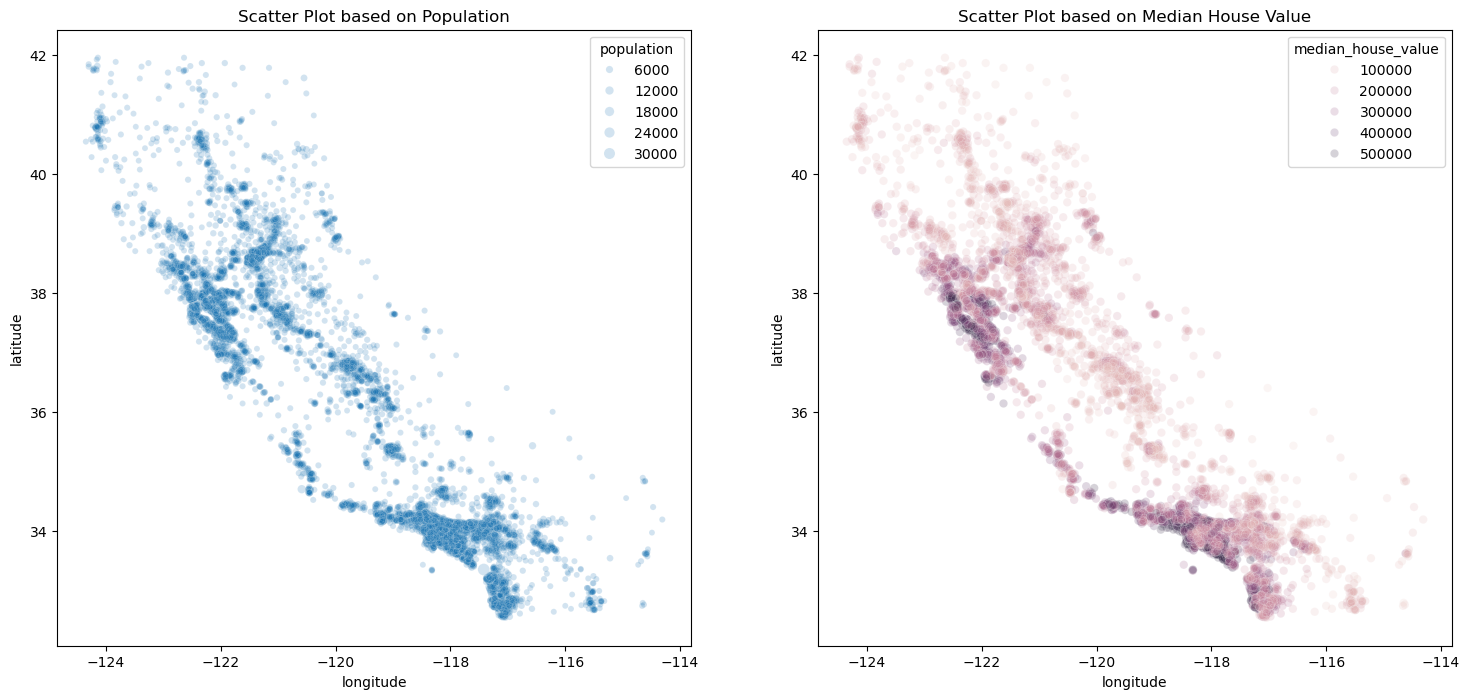

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(data=train,
                x="longitude",
                y="latitude",
                size="population",
                alpha=0.2,
                ax=ax[0])
ax[0].set_title("Scatter Plot based on Population")

# sns.move_legend(ax[0], "upper left", bbox_to_anchor=(1, 1))   # for moving legend

sns.scatterplot(data=train,
                x="longitude",
                y="latitude",
                hue="median_house_value",
                alpha=0.2,
                ax=ax[1])
ax[1].set_title("Scatter Plot based on Median House Value");

In [85]:
fig.savefig("./out/scatter_plot.png", dpi=300)